<a href="https://colab.research.google.com/github/sir-sauc3/cap-comp215/blob/main/Trial_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
from dataclasses import dataclass
from pprint import pprint
import random
from scipy.signal import correlate2d

import time

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
# class Deer:
  
#   def __init__(self, loc):
#     self.loc = tuple(loc)

#     weight = 20
#     max_weight = 60
#     metabolism = 5

  
#   def step():
#     #make a random cardinal movement
#     #graze if grass is there
#     #increase weight if deer grazed or decrease weight if deer didnt graze
#     return


def random_walk(n):
  x,y = 0,0

  for i in range(n):
    dx, dy = random.choice([(1,0), (-1,0), (0,1), (0,-1)])
    x+=dx
    y+=dy

  return((x, y))


for i in range(10):
  test = random_walk(15)
  print(f'abs coordinate positions are: {test}')

abs coordinate positions are: (3, -2)
abs coordinate positions are: (1, 4)
abs coordinate positions are: (-3, 0)
abs coordinate positions are: (-1, -2)
abs coordinate positions are: (-3, 0)
abs coordinate positions are: (1, -4)
abs coordinate positions are: (1, 2)
abs coordinate positions are: (-3, 0)
abs coordinate positions are: (-3, 2)
abs coordinate positions are: (2, -1)


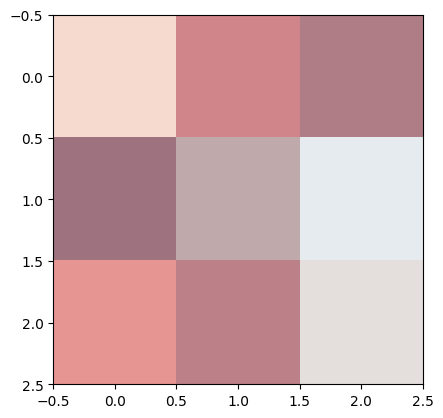

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create two NumPy arrays of the same size
arr1 = np.random.rand(3, 3)
arr2 = np.random.rand(3, 3)

# Display the arrays over each other using imshow
fig, ax = plt.subplots()
ax.imshow(arr1, cmap='Blues', alpha=0.5)
ax.imshow(arr2, cmap='Reds', alpha=0.5)
plt.show()

[[0.72374822 0.24683004 0.26111174]
 [0.79696049 0.68360272 0.84612312]
 [0.61169642 0.67753256 0.74205556]]


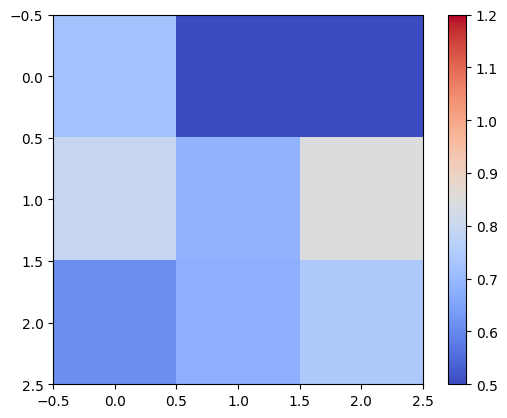

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 3x3 NumPy array with random values
arr = np.random.rand(3, 3)

print(arr)
# Display the array using a custom colormap
fig, ax = plt.subplots()
im = ax.imshow(arr, cmap='coolwarm', vmin=0.5, vmax=1.2)

# Add a colorbar to show the mapping of values to colors
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()

[[-0.6158997  -0.82136505 -0.7016908 ]
 [ 1.3533073   0.55699423  1.22079734]
 [ 1.44678248  1.49843565  0.78013924]]


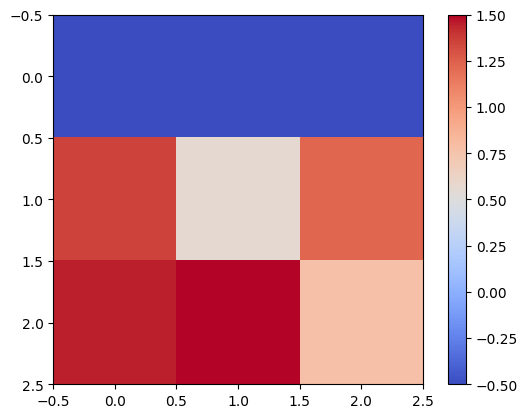

In [5]:
import numpy as np

arr = np.random.uniform(low=-1, high=2, size=(3, 3))

print(arr)
fig, ax = plt.subplots()
im = ax.imshow(arr, cmap='coolwarm', vmin=-0.5, vmax=1.5)

# Add a colorbar to show the mapping of values to colors
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()

In [28]:
class Grazing_sim:

  kernel = np.array([[0, 1, 0],
                     [1, 0, 1],
                     [0, 1, 0]])

  def __init__(self, size, deer_amt, q):
    self.size = size
    self.deer_amt = deer_amt
    self.q = q
    self.one = np.random.choice([1, 0], (self.size,self.size), p=(q, 1-q))
    two = np.random.choice(self.size**2, size=deer_amt, replace=False)
    x, y = np.unravel_index(two, (self.size, self.size))
    two = np.zeros((self.size,self.size))
    two[x,y] = 3

    print(self.one)
    correlated_matrix = correlate2d(self.one, self.kernel, mode='same', boundary='wrap')
    print(correlated_matrix)

    self.three = np.where(two==3, two, self.one)


  def draw(self):
    fig, ax = plt.subplots()
    cmap = [(225/225, 248/255, 220/255),(0,1,0),(0,0,0),(165/255, 42/255, 42/255)]
    field_color_map = matplotlib.colors.ListedColormap(cmap)
    ax.imshow(self.three, cmap=field_color_map, vmin=0, vmax=3)

    # title = f'Time:{step}'
    ax.axis('off')
    plt.show()

# print(one)
# print(two)

# deer_loc = two==3
# print(deer_loc)


In [30]:
q = 0.6
size = 9
deer_amt = 2

test = Grazing_sim(size, deer_amt, q)
# test.draw()

[[1 1 0 0 0 1 0 1 0]
 [0 1 1 1 0 1 0 1 0]
 [1 1 0 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 1 1]
 [0 0 1 0 1 0 1 0 1]
 [1 1 0 0 1 0 0 1 0]
 [1 1 0 1 1 0 0 1 1]
 [1 0 1 0 1 0 1 1 1]
 [1 1 0 1 1 0 1 1 1]]
[[2 3 2 2 2 1 3 2 3]
 [3 3 2 2 3 2 2 1 1]
 [2 3 4 3 3 3 2 2 2]
 [3 3 3 3 4 3 3 2 3]
 [3 3 1 3 2 3 1 4 1]
 [2 2 2 2 2 1 2 1 4]
 [4 2 3 1 3 1 2 3 3]
 [3 4 0 4 2 2 2 4 4]
 [4 2 3 1 2 3 2 4 3]]


In [21]:
'''
Probably want to use a kernel to tell the value of the neighboring cells
When a deer 'sees' that theres's a cell with a value of 1, it moves there
'''

"\nProbably want to use a kernel to tell the value of the neighboring cells\nWhen a deer 'sees' that theres's a cell with a value of 1, it moves there\n"

In [22]:
import numpy as np

# Create the first array with 0s and 1s
arr1 = np.array([[1, 0, 1],
                 [0, 1, 0],
                 [1, 1, 0]])

# Create the second array with 0s and 3s
arr2 = np.array([[0, 0, 0],
                 [3, 3, 0],
                 [0, 0, 3]])

# Create the third array by combining the first and second arrays
arr3 = np.where(arr2 == 3, arr2, arr1)

# Print the arrays to check the result
print("Array 1:\n", arr1)
print("Array 2:\n", arr2)
print("Array 3:\n", arr3)

Array 1:
 [[1 0 1]
 [0 1 0]
 [1 1 0]]
Array 2:
 [[0 0 0]
 [3 3 0]
 [0 0 3]]
Array 3:
 [[1 0 1]
 [3 3 0]
 [1 1 3]]
